# Spectrum properties per bifurcation

Manual computation of the peaks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import argrelextrema, find_peaks
from scipy import stats

In [2]:
def inv_irregularity(spectrum):

    if len(spectrum) == 1:
        return 0.0

    IRR = 0
    for k in range(1,len(spectrum)-1):
        k_contribution = 20 * np.log10(spectrum[k]) 
        k_contribution -= 1/3 * (20 * np.log10(spectrum[k+1])
                               + 20 * np.log10(spectrum[k])
                               + 20 * np.log10(spectrum[k-1]))
        IRR += np.abs(k_contribution)
    
    IRR = np.log10(IRR)
    
    return 1/IRR

In [3]:
def measures(xf, spectrum):
    
    center = spectrum @ xf / np.sum(spectrum)
    roughness = np.std(spectrum)
    iIRR = inv_irregularity(spectrum)
    
    return center, roughness, iIRR

In [4]:
folder = "Output_airflow"

## Van der Pol

In [5]:
with open(f"{folder}/VdP_fast_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [6]:
dt = tsol[1] - tsol[0]
vsol = np.diff(xsol)
len(xsol), len(vsol)

(441501, 441500)

In [7]:
start = np.argmax(xsol > 0.5)
end = np.argmax(xsol[::-1] > 0.5)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

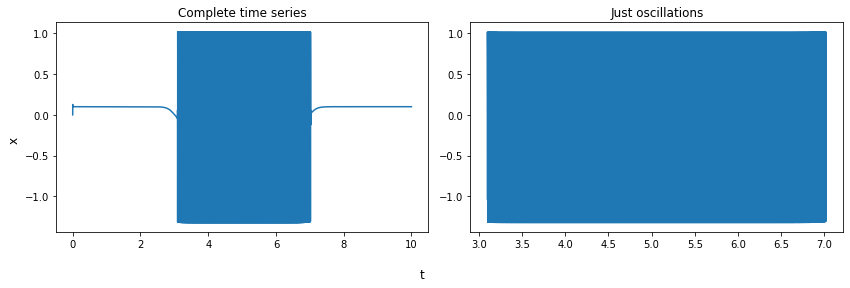

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

### Spectrum of the entire time series

In [9]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

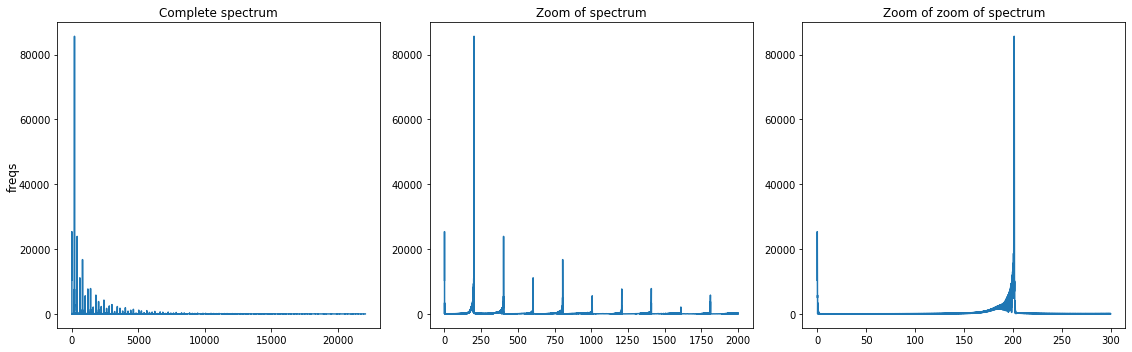

In [10]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:20000], spectrum[:20000])
ax[2].plot(xf[:3000], spectrum[:3000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Spectrum of the oscillation window

In [11]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

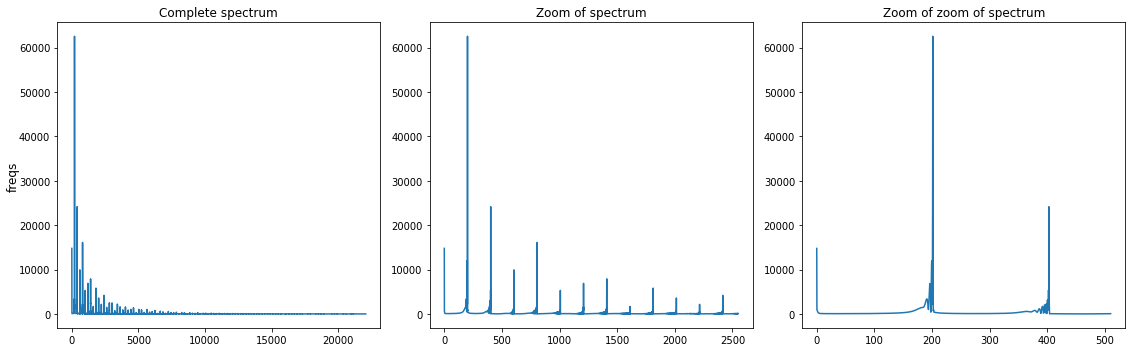

In [12]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:10000], spectrum[:10000])
ax[2].plot(xf[:2000], spectrum[:2000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Finding peaks

In [13]:
local_max = (find_peaks(spectrum[:10000], height=250, distance=200)[0],)
xf_local_max = xf[local_max]
spectrum_local_max = spectrum[local_max]

In [14]:
xf_local_max, spectrum_local_max

(array([ 201.18019059,  402.6153624 ,  604.05053422,  805.23072481,
        1006.66589662, 1207.84608721, 1409.28125902, 1610.71643084,
        1811.89662143, 2013.33179324, 2214.51198383, 2415.94715565]),
 array([62553.80335751, 24160.03480135,  9920.14288256, 16102.43546125,
         5302.1108914 ,  6881.4278874 ,  7894.87677361,  1682.3171163 ,
         5809.74661594,  3588.73986895,  2152.15594225,  4186.57091093]))

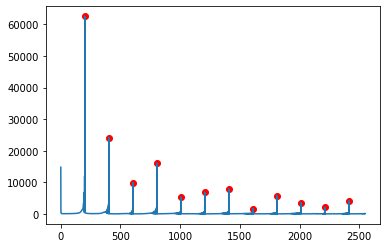

In [15]:
plt.plot(xf[:10000], spectrum[:10000])
plt.scatter(xf_local_max, spectrum_local_max, color="red")

In [16]:
center, roughness, iIRR = measures(xf_local_max, spectrum_local_max)
center, roughness, iIRR

(674.8637272686557, 16286.33547744625, 0.6501742351841613)

## Hopf

In [17]:
with open(f"{folder}/Hopf_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [18]:
dt = tsol[1]-tsol[0]
vsol = np.array([xsol[i+1]-xsol[i] for i in range(len(tsol)-1)])

In [19]:
start = np.argmax(xsol > 0.01)
end = np.argmax(xsol[::-1] > 0.01)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

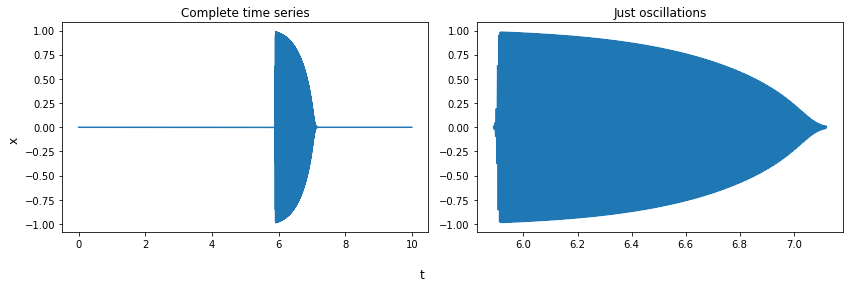

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

### Spectrum of the entire time series

In [21]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

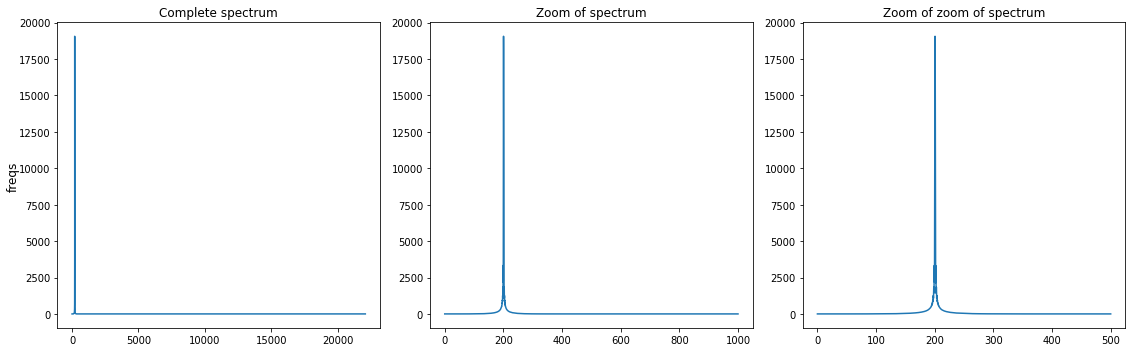

In [22]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:10000], spectrum[:10000])
ax[2].plot(xf[:5000], spectrum[:5000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Spectrum of the oscillation window

In [23]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

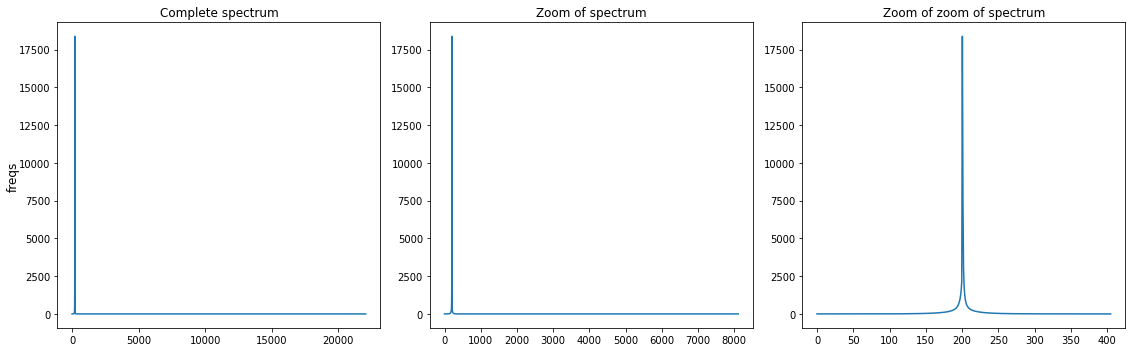

In [24]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:10000], spectrum[:10000])
ax[2].plot(xf[:500], spectrum[:500])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Finding peaks

In [25]:
local_max = (find_peaks(spectrum, height=250, distance=100)[0],)
xf_local_max = xf[local_max]
spectrum_local_max = spectrum[local_max]

In [26]:
xf_local_max, spectrum_local_max

(array([200.39048862]), array([18388.14959848]))

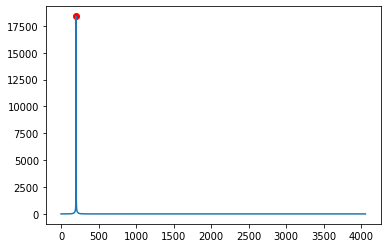

In [27]:
plt.plot(xf[:5000], spectrum[:5000])
plt.scatter(xf_local_max, spectrum_local_max, color="red")

In [28]:
center, roughness, iIRR = measures(xf_local_max, spectrum_local_max)
center, roughness, iIRR

(200.3904886161083, 0.0, 0.0)

## SNILC slow

In [29]:
with open(f"{folder}/SNILC_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [30]:
dt = tsol[1]-tsol[0]
vsol = np.array([xsol[i+1]-xsol[i] for i in range(len(tsol)-1)])

In [31]:
start = np.argmax(xsol[100:] > 0.99) + 100
end = np.argmax(xsol[::-1] < -0.99)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

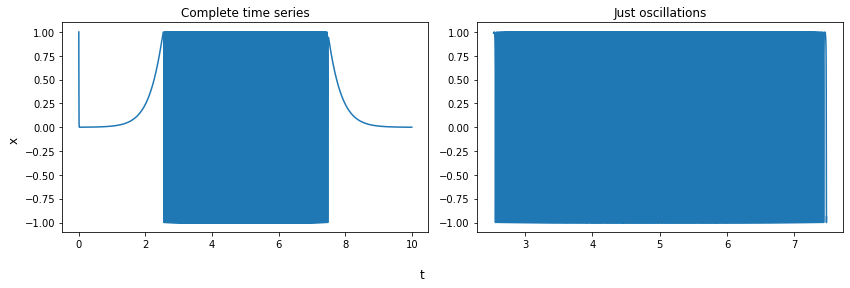

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

### Spectrum of the entire time series

In [33]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

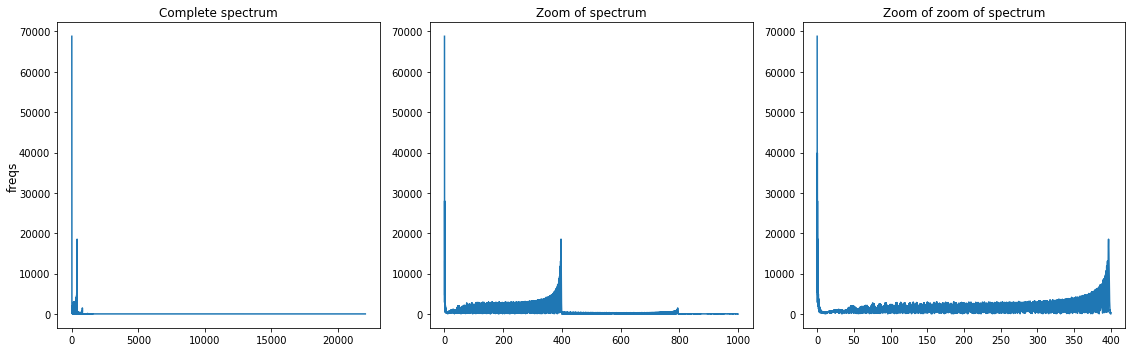

In [34]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:10000], spectrum[:10000])
ax[2].plot(xf[:4000], spectrum[:4000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Spectrum of the oscillation window

In [35]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

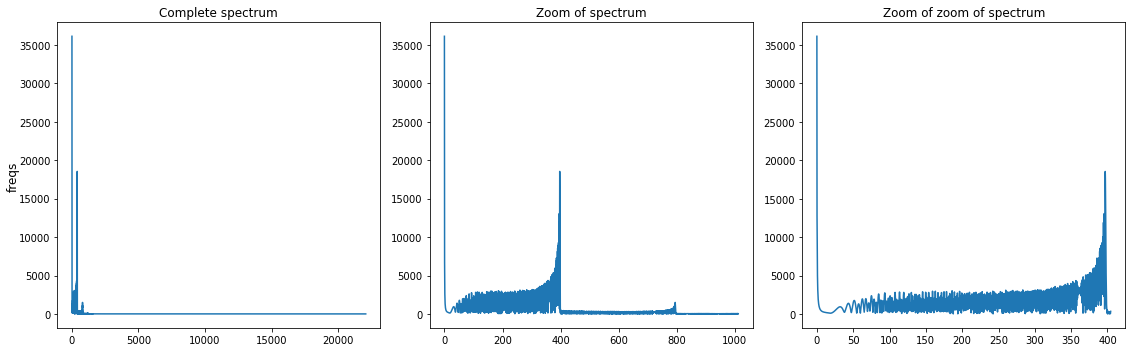

In [36]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:5000], spectrum[:5000])
ax[2].plot(xf[:2000], spectrum[:2000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Finding peaks

In [37]:
local_max = (find_peaks(spectrum, height=250, distance=100)[0],)
xf_local_max = xf[local_max]
spectrum_local_max = spectrum[local_max]

In [38]:
xf_local_max, spectrum_local_max

(array([ 43.29244544,  67.36628192,  93.46312987, 113.69324456,
        136.55327416, 159.21100262, 186.11705516, 207.15637443,
        227.58879027, 259.95697378, 283.42390682, 303.85632266,
        327.93015914, 352.20629677, 375.47092866, 396.91485023,
        428.87843144, 451.5361599 , 472.98008147, 508.18048103,
        537.10954504, 573.52375148, 600.02520173, 627.53815771,
        661.72705154, 687.41929719, 710.27932679, 747.30043668,
        770.16046628, 794.43660391]),
 array([ 1397.29487138,  2009.82601873,  2761.8613661 ,  2865.81872886,
         2560.4396697 ,  2975.7875483 ,  3029.43043066,  2701.65862904,
         2916.7720159 ,  3106.26211187,  3140.34554576,  3167.79221192,
         3581.34086495,  4217.72041169,  5367.53793659, 18549.36652804,
          425.55483166,   372.0196204 ,   414.09753125,   342.5126874 ,
          349.63310936,   347.3977437 ,   327.37490119,   314.82401998,
          329.77787875,   346.32956106,   362.81838743,   400.76070499,
          

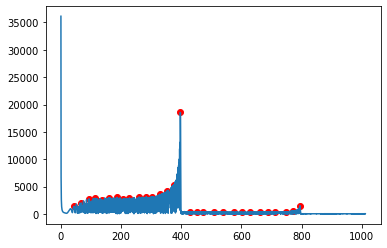

In [39]:
plt.plot(xf[:5000], spectrum[:5000])
plt.scatter(xf_local_max, spectrum_local_max, color="red")

In [40]:
center, roughness, iIRR = measures(xf_local_max, spectrum_local_max)
center, roughness, iIRR

(313.94117215188584, 3330.322061907461, 0.6335322508653841)

## SNILC fast

In [41]:
with open(f"{folder}/SNILC_fast_xsol.pkl", 'rb') as f:
    soldict = pickle.load(f)
    tsol = soldict["tsol"]
    xsol = soldict["xsol"]

In [42]:
dt = tsol[1]-tsol[0]
vsol = np.array([xsol[i+1]-xsol[i] for i in range(len(tsol)-1)])

In [43]:
start = np.argmax(xsol[100:] > 0.99) + 100
end = np.argmax(xsol[::-1] < -0.99)
window = [start-10,10-end]
xwindow = xsol[window[0]:window[1]]
twindow = tsol[window[0]:window[1]]

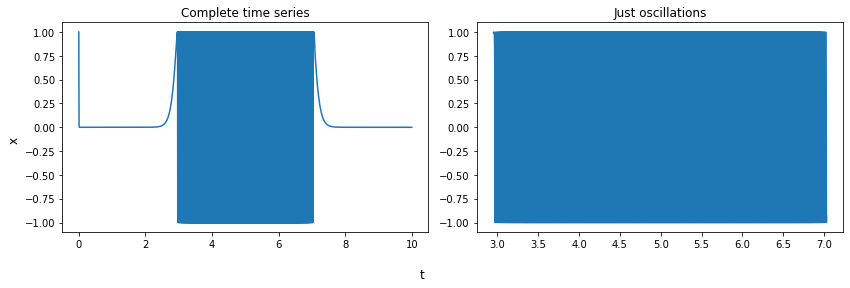

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.supylabel("x")
fig.supxlabel("t")

ax[0].plot(tsol,xsol)
ax[1].plot(twindow, xwindow)

ax[0].set_title("Complete time series")
ax[1].set_title("Just oscillations")

plt.tight_layout()

### Spectrum of the entire time series

In [45]:
xf = fftfreq(len(xsol), dt)[:len(xsol)//2]
yf = fft(xsol)
spectrum = np.abs(yf)[:len(xsol)//2]

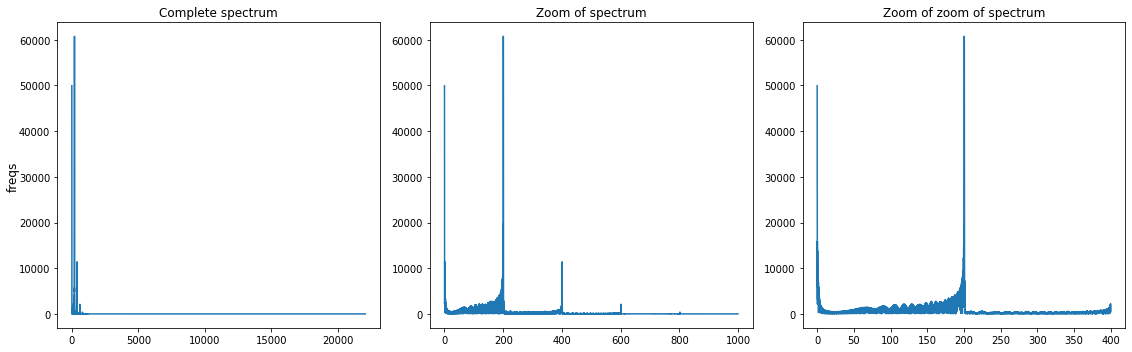

In [46]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:10000], spectrum[:10000])
ax[2].plot(xf[:4000], spectrum[:4000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Spectrum of the oscillation window

In [47]:
xf = fftfreq(len(xwindow), dt)[:len(xwindow)//2]
yf = fft(xwindow)
spectrum = np.abs(yf)[:len(xwindow)//2]

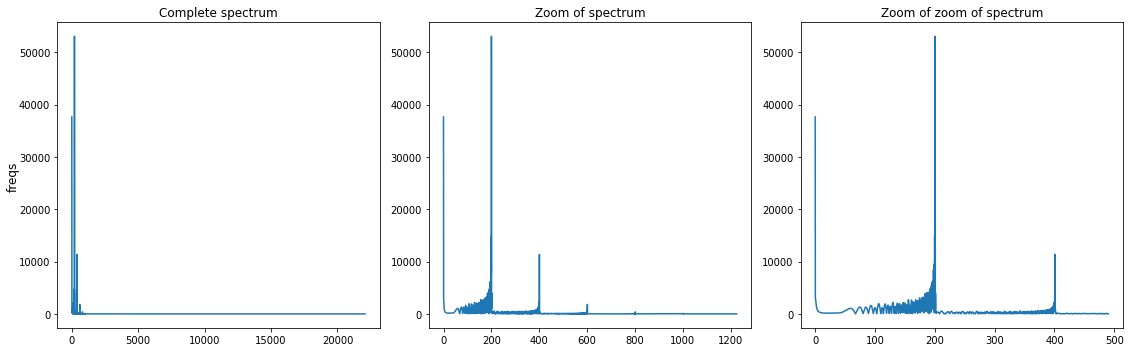

In [48]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

fig.supylabel("freqs")

ax[0].plot(xf, spectrum)
ax[1].plot(xf[:5000], spectrum[:5000])
ax[2].plot(xf[:2000], spectrum[:2000])

ax[0].set_title("Complete spectrum")
ax[1].set_title("Zoom of spectrum")
ax[2].set_title("Zoom of zoom of spectrum")

plt.tight_layout()

### Finding peaks

In [49]:
local_max = (find_peaks(spectrum, height=100, distance=100)[0],)
xf_local_max = xf[local_max]
spectrum_local_max = spectrum[local_max]

In [50]:
xf_local_max, spectrum_local_max

(array([ 30.16095618,  58.60543519,  93.18018984, 129.96184372,
        174.59025043, 200.33740815, 227.55583202, 269.9773395 ,
        316.32222339, 342.31459214, 372.2303373 , 400.92002733,
        448.9813884 , 486.74388639, 516.41442052, 547.06579875,
        576.49112186, 601.5026465 , 801.84005465]),
 array([  158.38502208,  1066.81379378,  1618.38426526,  2199.65298897,
         3061.02060862, 53054.87436664,   500.98420636,   516.8813821 ,
          519.68220592,   579.20949893,   651.58369566, 11366.56585054,
          119.61283798,   120.120195  ,   112.81741096,   132.38228048,
          136.60340001,  1815.24313699,   385.09493325]))

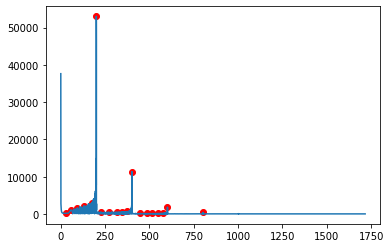

In [51]:
plt.plot(xf[:7000], spectrum[:7000])
plt.scatter(xf_local_max, spectrum_local_max, color="red")

In [52]:
center, roughness, iIRR = measures(xf_local_max, spectrum_local_max)
center, roughness, iIRR

(240.7366599660967, 11800.792942754846, 0.48897694325793684)

#### Finding peaks within the peaks

We have to manually add the last one, as the find_peaks() function does not consider the extremes.

In [53]:
local_local_max = (find_peaks(spectrum_local_max, distance=3)[0],)
xf_local_local_max = np.append(xf_local_max[local_local_max],[xf_local_max[-1]])
spectrum_local_local_max = np.append(spectrum_local_max[local_local_max],[xf_local_max[-1]])

In [54]:
xf_local_local_max, spectrum_local_local_max

(array([200.33740815, 400.92002733, 601.5026465 , 801.84005465]),
 array([53054.87436664, 11366.56585054,  1815.24313699,   801.84005465]))

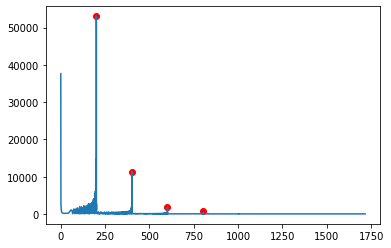

In [55]:
plt.plot(xf[:7000], spectrum[:7000])
plt.scatter(xf_local_local_max, spectrum_local_local_max, color="red")

In [56]:
center, roughness, iIRR = measures(xf_local_local_max, spectrum_local_local_max)
center, roughness, iIRR

(252.403842977478, 21356.589517090164, 1.726039004965538)

## RECAP

Numerically: we obtain almost exactly the same spectrum considering the entire times series or the oscillating window

Bifurcation: &emsp; Center, &emsp; roughness, &emsp; iIRR 

VdP: &emsp; 674.864, &emsp;  16286.335, &emsp; 0.6502

Hopf: &emsp; 200.390, &emsp; 0.0, &emsp; 0.0

SNILC: &emsp;  252.404, &emsp; 21356.589, &emsp; 1.7260